# Notebook2

In [93]:
#import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df = pd.read_csv('cardata.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [95]:
df=df.drop_duplicates()

# Preprocessing

In [96]:
df['Age'] = 2023 - df['Year']
df.drop('Year',axis=1,inplace = True)

We are creating a new column named 'Age' and then we are dropping the existing column named 'Year'. It is calculated by subtracting the values in the year column from the current year. Axis equals to 1 means that dropping the column as opposed to axis equals means that dropping a row. This transformation will be more useful for analytical purposes.

In [97]:
df.drop(labels='Car_Name',axis= 1, inplace = True)

We do not need the 'car_name' column for our model. We can drop it for now.

In [98]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [99]:
df['Selling_Price'] = df['Selling_Price'] * 1000
df['Present_Price'] = df['Present_Price'] * 1000

The price is in indian currency. We do not want a different currency so that we can convert it to Euros by multiplying the price by 1000.

In [100]:
df.rename(columns = {'Selling_Price':'Selling_Price(Euro)','Present_Price':'Present_Price(Euro)'},inplace = True)

For better understanding we changed the column names as follow: Selling_Price(Euro) and 'Present_Price(Euro).

In [101]:
df.head()

,Selling_Price(Euro),Present_Price(Euro),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3350.0,5590.0,27000,Petrol,Dealer,Manual,0,9
1,4750.0,9540.0,43000,Diesel,Dealer,Manual,0,10
2,7250.0,9850.0,6900,Petrol,Dealer,Manual,0,6
3,2850.0,4150.0,5200,Petrol,Dealer,Manual,0,12
4,4600.0,6870.0,42450,Diesel,Dealer,Manual,0,9


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Selling_Price(Euro)  299 non-null    float64
 1   Present_Price(Euro)  299 non-null    float64
 2   Kms_Driven           299 non-null    int64  
 3   Fuel_Type            299 non-null    object 
 4   Seller_Type          299 non-null    object 
 5   Transmission         299 non-null    object 
 6   Owner                299 non-null    int64  
 7   Age                  299 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 21.0+ KB


In [103]:
df['Selling_Price(Euro)'] = df['Selling_Price(Euro)'].astype(int)
df['Present_Price(Euro)'] = df['Present_Price(Euro)'].astype(int)

We have different data types in the dataframe. There is no need for the price columns to be of float type so we can convert them into the integers and we have 3 string columns. We will apply label encoding in the upcoming codes.

In [104]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Seller_Type'] = le.fit_transform(df['Seller_Type'])
df['Transmission'] = le.fit_transform(df['Transmission'])

df.head()

,Selling_Price(Euro),Present_Price(Euro),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3350,5590,27000,2,0,1,0,9
1,4750,9540,43000,1,0,1,0,10
2,7250,9850,6900,2,0,1,0,6
3,2850,4150,5200,2,0,1,0,12
4,4600,6870,42450,1,0,1,0,9


The purpose of this code is to prepare the string columns for modeling. It is converting categorical features into numerical values. This enables the computer to understand the data. Machine learning algorithms that used for our project work with numerical data not text data.

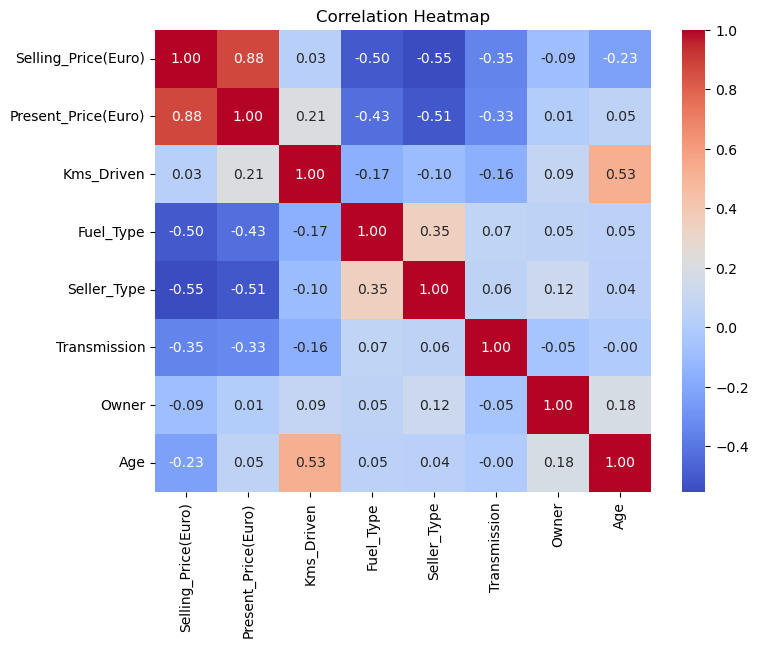

In [105]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

We can see the correlation between multiple variables in correlation heatmap. It shows how closely related different variables are. Each variable is represented by a row and a column and the cells show the correlation between them. Correlation ranges from -1 to +1. If values closer to zero, it means that there is no correlation between the two variables. The close to 1 and -1 the correlation is the more positively correlated. For example, the correlation closer to 1, when one variable will increase, other variable increases as well. On the other hand, If the correlation closer to -1, when one variable will decrease as the other increases. Also, If the cell is darker, it means that there is a strong correlarion there. On the other hand, it represent a low correlation if the cell has lighter color.

In the following codes we will create models and we should look the values of present price. It is so clear that there is a positive correlation between present price and selling price with a value of 0.88. Other than that, we will not include the Owner, Age and Kms_Driven columns due to low accuracy scores.

# Linear Regression

In [106]:
X = df.drop(['Selling_Price(Euro)','Kms_Driven', 'Owner', 'Age'], axis = 1) 
Y = df['Selling_Price(Euro)']

Preprocessing is done and now we are preparing the data for modeling by splitting it into features and the target variable. We drop the 'Selling_Price(Euro)' column because that column holds the values we want to predict and we will drop other columns due to low correlation. The purpose is to separate the features from the target variable.

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=23)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",Y_train.shape)
print("y test: ",Y_test.shape)

x train:  (239, 4)
x test:  (60, 4)
y train:  (239,)
y test:  (60,)


In this section of the code, we are splitting our data into training and testing sets. This is a crucial step in machine learning model development to ensure that the model is trained on one subset of data and evaluated on another independent subset. The train_test_split function does this splitting for both the features and the target variable. The purpose is to prevent overfitting by assessing the model's performance on unseen data during testing. The printed statements provide information about the sizes of the resulting datasets, helping us confirm that the split was done correctly

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Creating a LinearRegression model
lr = LinearRegression()
# Fitting the model to the training data
lr.fit(X_train,Y_train)
# Making predictions on the test data
predictions = lr.predict(X_test)

The purpose of this code is to perform linear regression analysis. To perform linear regression analysis we are using scikit-learn library. In the second line of the code, we are creating an instance of the LinearRegression class and assigns it to the variable. We will use it to build and train our model. After the model is trained, last line uses the trained model to make predictions.

In [109]:
# Calculating the R-squared score
lr_r2 = r2_score(Y_test, predictions)
print("R-squared score:", lr_r2)

R-squared score: 0.7786651950889847


With this code, we can calculate the R square of our model. The purpose of that is to assess how well the model fits the data. It is a statistical measure that indicates the proportion of the variance in the dependent variable that can be explained by the independent variables used in the model. It is a value between 0 and 1, where

R² = 0 indicates that the model does not explain any variability in the dependent variable.
R² = 1 indicates that the model perfectly explains the variability in the dependent variable.
An R² value closer to 1 suggests that the model's predictions closely match the actual target values, indicating a good fit. An R² value closer to 0 suggests that the model does not fit the data well.

When we look our output which is 0.77, it means that model's predictions are quite consistent with the actual target values. Model provides a good fit to the data. However, it's important to note that a high R² score doesn't necessarily mean the model is perfect. We should be careful about potential overfitting and context of the data.

# Decision Tree

In [110]:
from sklearn.tree import DecisionTreeRegressor
# Creating a DecisionTreeRegressor model
dt_model = DecisionTreeRegressor(random_state=2)
# Fitting the model to the training data
dt_model.fit(X_train, Y_train)
# Making predictions on the test data
predictions_tree = dt_model.predict(X_test)

In [111]:
# Calculating the R-squared score
dt_model_r2 = r2_score(Y_test, predictions_tree)
print("R-squared score:", dt_model_r2)

R-squared score: 0.7326585580761407


Our score for decision tree model is 0.73. When we compare it to Linear Regression model it is relatively low but it still represents a high score which means that there are no errors in our data.

# Random Forest

In [112]:
from sklearn.ensemble import RandomForestRegressor
# Creating a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=3)
# Fitting the model to the training data
rf_model.fit(X_train, Y_train)
# Making predictions on the test data
predictions_rf = rf_model.predict(X_test)

In [113]:
# Calculating the R-squared score
rf_model_r2 = r2_score(Y_test, predictions_rf)
print("R-squared score:", rf_model_r2)

R-squared score: 0.7679321833914338


The random forest is our final model, and it once again achieved a high score of 0.76. This score is nearly identical to the linear model's performance.

# Comparison of Models

In [114]:
# Create a DataFrame to store the results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'R-squared Score': [lr_r2, dt_model_r2, rf_model_r2]
})

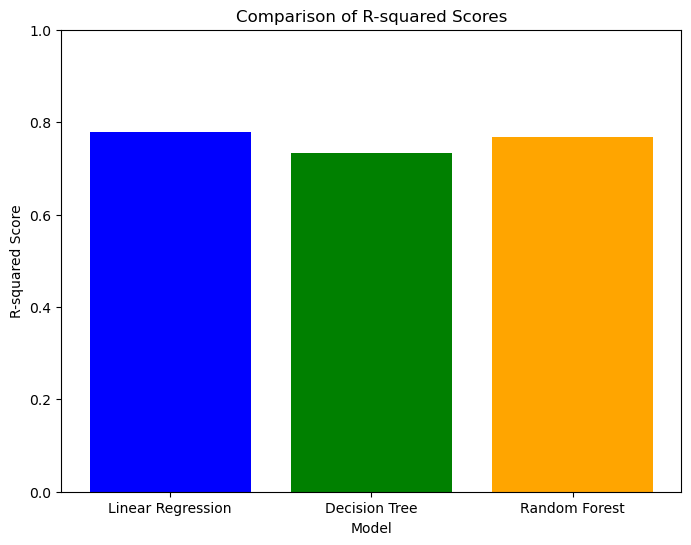

               Model  R-squared Score
0  Linear Regression         0.778665
1      Decision Tree         0.732659
2      Random Forest         0.767932


In [115]:
# Create a bar plot to visualize R-squared scores
plt.figure(figsize=(8, 6))
plt.bar(results['Model'], results['R-squared Score'], color=['blue', 'green', 'orange'])
plt.xlabel('Model')
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared Scores')
plt.ylim(0, 1)
plt.show()

print(results)

Although all the scores are good enough, we will use Linear Regression for the project. With the following code we will import our model and it will be ready to use in our streamlit web app.

In [116]:
import pickle
pickle.dump(lr, open('./model_lr.sav', 'wb'))